# The notebook based on the random-selected dataset3.

In [51]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Data Preprocessing

In [1]:
import pandas as pd

In [2]:
train=pd.read_csv('training set3.csv')

### Transform the event_time into type of (midnight, forenoon, afternoon and evening)

In [3]:
train['event_time']=[x[11:13] for x in train['event_time']]
train

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,09,view,1306661,2053013558920217191,computers.notebook,hp,309.99,512838002,ca57731d-d5cc-4f14-9421-165285de3862
1,16,view,2701390,2053013563911439225,appliances.kitchen.refrigerators,lg,1299.88,526027947,164c5463-9b0b-432c-9a8b-9b97b3617983
2,13,view,17302934,2053013553853497655,NaN,NaN,208.50,557468805,b5e3d729-dd56-4eac-a345-fd327bfe0d4d
3,03,view,1004781,2053013555631882655,electronics.smartphone,huawei,264.85,522357034,343a86f0-40b0-4566-aa14-4243391f09c1
4,03,view,28715856,2053013565639492569,apparel.shoes,respect,80.83,564576220,783bacdc-ba84-440b-bf1d-176865d1da19
5,07,view,5701246,2053013553970938175,auto.accessories.player,NaN,23.14,559390394,9037fd09-c3fa-4417-bf3e-d90526c6164c
6,04,view,11400446,2053013558458843721,NaN,xiaomi,14.16,537659124,e83c4284-5502-40ca-a4f3-2cc28812a735
7,10,view,2601503,2053013563970159485,NaN,NaN,89.84,550050812,2758147d-a51b-4799-b32d-bdd70e859a94
8,11,cart,6301923,2053013554834964853,appliances.kitchen.kettle,elenberg,12.84,515613442,0b1c885a-2fbd-4953-87e5-d52334147435
9,09,view,2900536,2053013554776244595,appliances.kitchen.microwave,elenberg,50.91,529868815,115c355e-6bce-44e6-b227-189fb2621d7b


In [4]:
for i in range(0,len(train['event_time'])):
    if 0<=int(train['event_time'][i])<6:
        train.loc[i,'event_time'] = 'midnight'
    elif 6<=int(train['event_time'][i])<12:
        train.loc[i,'event_time'] = 'forenoon'
    elif 12<=int(train['event_time'][i])<18:
        train.loc[i,'event_time'] = 'afternoon'
    elif 18<=int(train['event_time'][i])<=24:
        train.loc[i,'event_time'] = 'evening'

In [5]:
train.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,forenoon,view,1306661,2053013558920217191,computers.notebook,hp,309.99,512838002,ca57731d-d5cc-4f14-9421-165285de3862
1,afternoon,view,2701390,2053013563911439225,appliances.kitchen.refrigerators,lg,1299.88,526027947,164c5463-9b0b-432c-9a8b-9b97b3617983
2,afternoon,view,17302934,2053013553853497655,NaN,NaN,208.50,557468805,b5e3d729-dd56-4eac-a345-fd327bfe0d4d
3,midnight,view,1004781,2053013555631882655,electronics.smartphone,huawei,264.85,522357034,343a86f0-40b0-4566-aa14-4243391f09c1
4,midnight,view,28715856,2053013565639492569,apparel.shoes,respect,80.83,564576220,783bacdc-ba84-440b-bf1d-176865d1da19


### Drop out the missing value.

In [6]:
train=train.dropna()

# Develop a (Xtrain，Ytrain) set.

In [67]:
X= train.drop('event_type',axis=1)
Y=train.iloc[:,1]

In [68]:
X

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session
0,forenoon,1306661,2053013558920217191,computers.notebook,hp,309.99,512838002,ca57731d-d5cc-4f14-9421-165285de3862
1,afternoon,2701390,2053013563911439225,appliances.kitchen.refrigerators,lg,1299.88,526027947,164c5463-9b0b-432c-9a8b-9b97b3617983
3,midnight,1004781,2053013555631882655,electronics.smartphone,huawei,264.85,522357034,343a86f0-40b0-4566-aa14-4243391f09c1
4,midnight,28715856,2053013565639492569,apparel.shoes,respect,80.83,564576220,783bacdc-ba84-440b-bf1d-176865d1da19
8,forenoon,6301923,2053013554834964853,appliances.kitchen.kettle,elenberg,12.84,515613442,0b1c885a-2fbd-4953-87e5-d52334147435
...,...,...,...,...,...,...,...,...
9992,forenoon,3601489,2053013563810775923,appliances.kitchen.washer,samsung,489.04,545401108,5a161d98-50c9-4c04-9e5e-03a3a5e9bb97
9994,forenoon,28716666,2053013565639492569,apparel.shoes,respect,89.84,513840315,e2eb408b-7b1e-4677-85d8-0cd485ae6ea7
9996,afternoon,3601212,2053013563810775923,appliances.kitchen.washer,lg,406.44,517832950,7772f9b4-5c7a-4a31-8495-fc2a6f28fba1
9997,forenoon,28716469,2053013565782098913,apparel.shoes,respect,95.24,546356471,d610dd47-8ec1-48a3-8aee-ad4f06653cad


In [69]:
Y

0       view
1       view
3       view
4       view
8       cart
        ... 
9992    view
9994    view
9996    view
9997    view
9998    view
Name: event_type, Length: 6250, dtype: object

### LabelEncoder

In [70]:
product_tags = X.iloc[:, 0]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
X.iloc[:, 0] = label

product_tags = X.iloc[:, 3]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
X.iloc[:, 3] = label

product_tags = X.iloc[:, 4]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
X.iloc[:, 4] = label

product_tags = X.iloc[:, 7]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
X.iloc[:, 7] = label

In [71]:
X

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session
0,2,1306661,2053013558920217191,62,232,309.99,512838002,4939
1,0,2701390,2053013563911439225,38,284,1299.88,526027947,531
3,3,1004781,2053013555631882655,84,235,264.85,522357034,1277
4,3,28715856,2053013565639492569,8,408,80.83,564576220,2970
8,2,6301923,2053013554834964853,33,163,12.84,515613442,263
...,...,...,...,...,...,...,...,...
9992,2,3601489,2053013563810775923,41,427,489.04,545401108,2207
9994,2,28716666,2053013565639492569,8,408,89.84,513840315,5508
9996,0,3601212,2053013563810775923,41,284,406.44,517832950,2950
9997,2,28716469,2053013565782098913,8,408,95.24,546356471,5206


In [72]:
Y

0       view
1       view
3       view
4       view
8       cart
        ... 
9992    view
9994    view
9996    view
9997    view
9998    view
Name: event_type, Length: 6250, dtype: object

In [73]:
df=pd.concat([X,Y],axis=1)
df.head()

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session,event_type
0,2,1306661,2053013558920217191,62,232,309.99,512838002,4939,view
1,0,2701390,2053013563911439225,38,284,1299.88,526027947,531,view
3,3,1004781,2053013555631882655,84,235,264.85,522357034,1277,view
4,3,28715856,2053013565639492569,8,408,80.83,564576220,2970,view
8,2,6301923,2053013554834964853,33,163,12.84,515613442,263,cart


In [74]:
product_tags = df.iloc[:, 8]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
df.iloc[:, 8] = label

In [75]:
df

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session,event_type
0,2,1306661,2053013558920217191,62,232,309.99,512838002,4939,2
1,0,2701390,2053013563911439225,38,284,1299.88,526027947,531,2
3,3,1004781,2053013555631882655,84,235,264.85,522357034,1277,2
4,3,28715856,2053013565639492569,8,408,80.83,564576220,2970,2
8,2,6301923,2053013554834964853,33,163,12.84,515613442,263,0
...,...,...,...,...,...,...,...,...,...
9992,2,3601489,2053013563810775923,41,427,489.04,545401108,2207,2
9994,2,28716666,2053013565639492569,8,408,89.84,513840315,5508,2
9996,0,3601212,2053013563810775923,41,284,406.44,517832950,2950,2
9997,2,28716469,2053013565782098913,8,408,95.24,546356471,5206,2


# Visualization and data analysis

In [76]:
train

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,forenoon,view,1306661,2053013558920217191,computers.notebook,hp,309.99,512838002,ca57731d-d5cc-4f14-9421-165285de3862
1,afternoon,view,2701390,2053013563911439225,appliances.kitchen.refrigerators,lg,1299.88,526027947,164c5463-9b0b-432c-9a8b-9b97b3617983
3,midnight,view,1004781,2053013555631882655,electronics.smartphone,huawei,264.85,522357034,343a86f0-40b0-4566-aa14-4243391f09c1
4,midnight,view,28715856,2053013565639492569,apparel.shoes,respect,80.83,564576220,783bacdc-ba84-440b-bf1d-176865d1da19
8,forenoon,cart,6301923,2053013554834964853,appliances.kitchen.kettle,elenberg,12.84,515613442,0b1c885a-2fbd-4953-87e5-d52334147435
...,...,...,...,...,...,...,...,...,...
9992,forenoon,view,3601489,2053013563810775923,appliances.kitchen.washer,samsung,489.04,545401108,5a161d98-50c9-4c04-9e5e-03a3a5e9bb97
9994,forenoon,view,28716666,2053013565639492569,apparel.shoes,respect,89.84,513840315,e2eb408b-7b1e-4677-85d8-0cd485ae6ea7
9996,afternoon,view,3601212,2053013563810775923,appliances.kitchen.washer,lg,406.44,517832950,7772f9b4-5c7a-4a31-8495-fc2a6f28fba1
9997,forenoon,view,28716469,2053013565782098913,apparel.shoes,respect,95.24,546356471,d610dd47-8ec1-48a3-8aee-ad4f06653cad


In [77]:
train.describe()

,product_id,category_id,price,user_id
count,6.250000e+03,6.250000e+03,6250.000000,6.250000e+03
mean,6.720051e+06,2.056100e+18,354.275930,5.369059e+08
std,1.281338e+07,1.671326e+16,382.587124,2.180209e+07
min,1.001618e+06,2.053014e+18,1.120000,2.994563e+08
25%,1.004929e+06,2.053014e+18,107.910000,5.164073e+08
50%,1.801779e+06,2.053014e+18,217.510000,5.328567e+08
75%,5.100719e+06,2.053014e+18,454.595000,5.568140e+08
max,1.000270e+08,2.185525e+18,2574.070000,5.798382e+08


In [78]:
train["event_time"].value_counts()

afternoon    2354
forenoon     2022
midnight     1107
evening       767
Name: event_time, dtype: int64

In [79]:
train["event_time"].value_counts()

afternoon    2354
forenoon     2022
midnight     1107
evening       767
Name: event_time, dtype: int64

In [80]:
train["brand"].value_counts()

samsung         1181
apple            903
xiaomi           596
huawei           193
lg               155
                ... 
cube               1
mebelswow-rn       1
aurora             1
leem               1
bose               1
Name: brand, Length: 540, dtype: int64

In [81]:
train["price"].value_counts()

231.64     28
308.86     26
89.84      25
386.08     25
154.42     25
           ..
64.22       1
955.84      1
1661.15     1
1347.99     1
31.66       1
Name: price, Length: 3420, dtype: int64

Saving figure attribute_histogram_plots


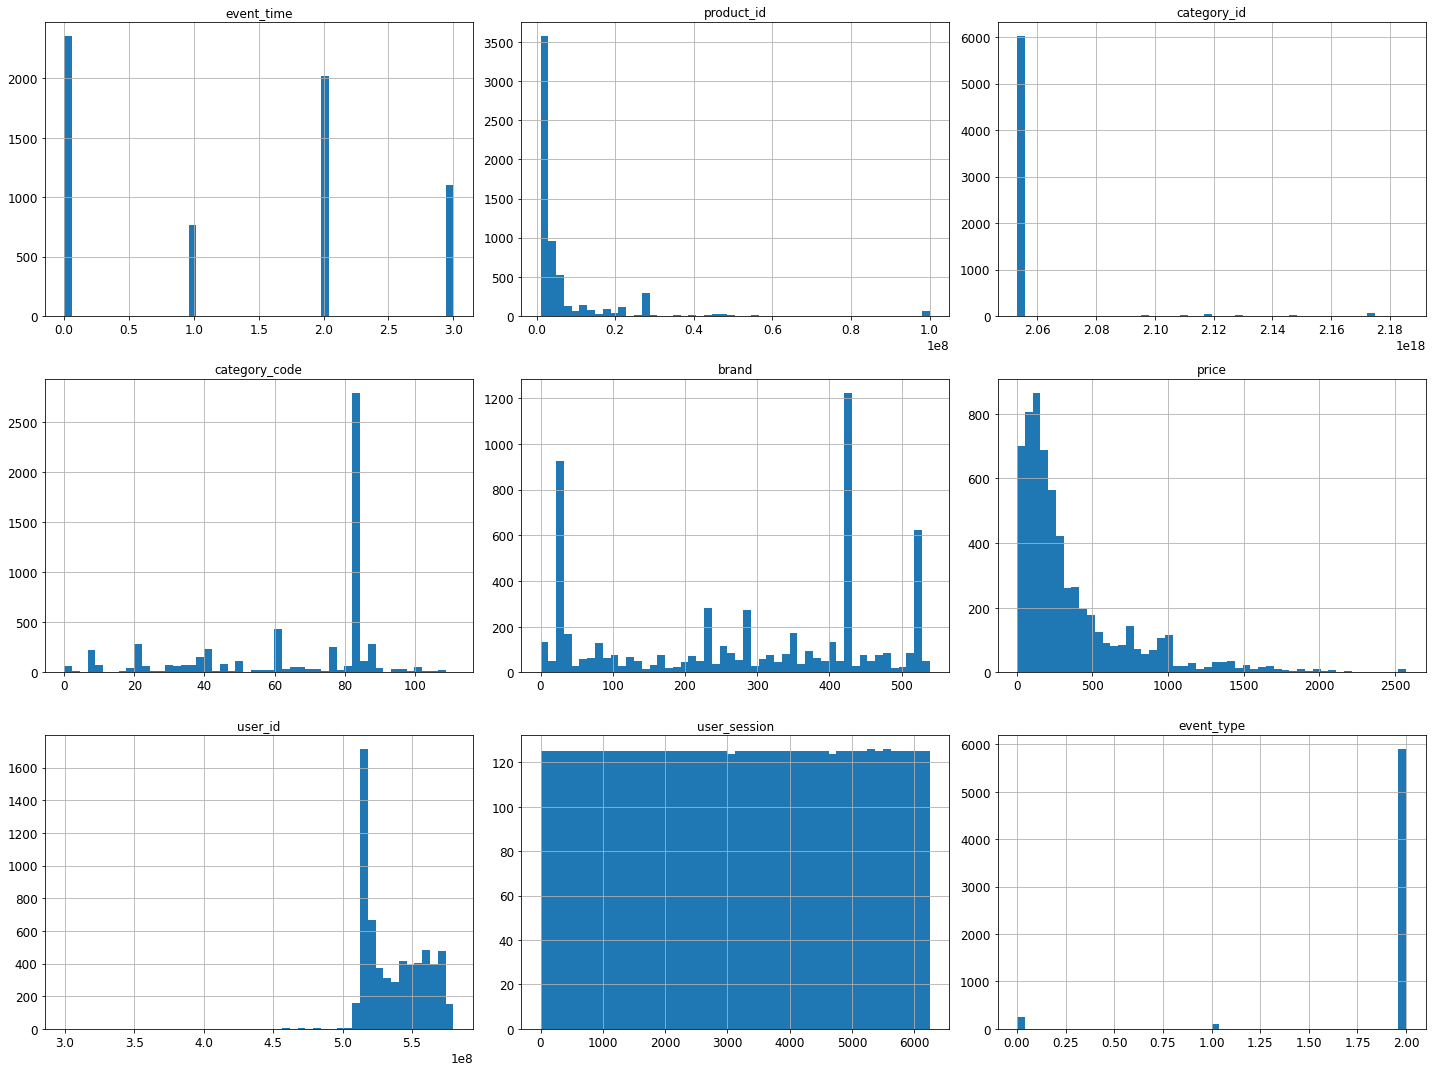

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.figure(dpi=300)
plt.show()

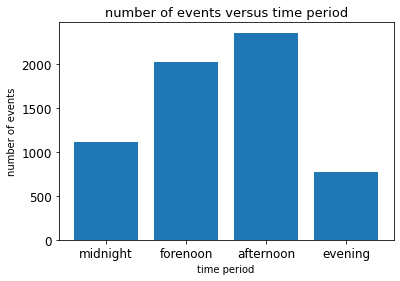

In [83]:
length1 = train["event_time"].value_counts()[2]
length2 = train["event_time"].value_counts()[1]
length3 = train["event_time"].value_counts()[0]
length4 = train["event_time"].value_counts()[3]

data = pd.DataFrame({'midnight':[length1],'forenoon':[length2],'afternoon':[length3],'evening':[length4]})
fig,ax = plt.subplots()
ax.bar(range(4),data.sum())
ax.set_xticks(range(4))
ax.set_xticklabels(data.columns)
ax.set_xlabel('time period',fontsize=10)
ax.set_ylabel('number of events',fontsize=10)
plt.title('number of events versus time period',fontsize=13)
plt.figure(dpi=300)
plt.show()


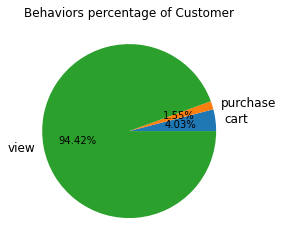

In [84]:
pie_chart = train.groupby('event_type').size().reset_index(name = 'temp')
plt.pie(pie_chart['temp'], labels = pie_chart['event_type'],autopct = '%1.2f%%')
plt.title('Behaviors percentage of Customer')
plt.figure(dpi=500)
plt.subplots_adjust(0.3,0,1,1)
plt.show()

In [ ]:
af = train["price"]
import matplotlib.pyplot as plt
af.hist(bins=50, figsize=(10,7.5))
plt.xlabel('price of a product',fontsize=15)
plt.ylabel('number of products',fontsize=15)
plt.figure(dpi=150)
plt.show()

# Models operating

# 1.Linear regression

In [7]:
df1=train.drop(['product_id','category_id','category_code','user_id','user_session'],axis=1)

In [8]:
df1

,event_time,event_type,brand,price
0,forenoon,view,hp,309.99
1,afternoon,view,lg,1299.88
3,midnight,view,huawei,264.85
4,midnight,view,respect,80.83
8,forenoon,cart,elenberg,12.84
9,forenoon,view,elenberg,50.91
10,forenoon,view,samsung,169.52
12,afternoon,view,scarlett,15.86
13,forenoon,view,lg,100.36
16,forenoon,view,apple,1002.86


In [9]:
product_tags = df1.iloc[:, 0]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
le = le.fit(product_tags)
label = le.transform(product_tags)
df1.iloc[:, 0] = label\

product_tags1 = df1.iloc[:, 1]
le = LabelEncoder() 
le = le.fit(product_tags1)
label = le.transform(product_tags1)
df1.iloc[:, 1] = label

product_tags2 = df1.iloc[:, 2]
le = LabelEncoder() 
le = le.fit(product_tags2)
label = le.transform(product_tags2)
df1.iloc[:, 2] = label

In [10]:
df1

,event_time,event_type,brand,price
0,2,2,232,309.99
1,0,2,284,1299.88
3,3,2,235,264.85
4,3,2,408,80.83
8,2,0,163,12.84
9,2,2,163,50.91
10,2,2,427,169.52
12,0,2,430,15.86
13,2,2,284,100.36
16,2,2,29,1002.86


In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df1, test_size=0.2, random_state=42)

In [12]:
test_set.head()

,event_time,event_type,brand,price
8027,0,2,171,25.48
963,2,0,349,154.42
8899,1,2,29,1747.79
6868,3,2,427,278.38
7377,3,2,427,559.86


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import seaborn as sns
from sklearn import linear_model

In [14]:
results = smf.ols('event_time ~ event_type + price + brand', data=df1).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             event_time   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.100
Date:                Sat, 02 Oct 2021   Prob (F-statistic):           0.000386
Time:                        02:40:28   Log-Likelihood:                -9722.0
No. Observations:                6250   AIC:                         1.945e+04
Df Residuals:                    6246   BIC:                         1.948e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6036      0.076     21.044      0.0

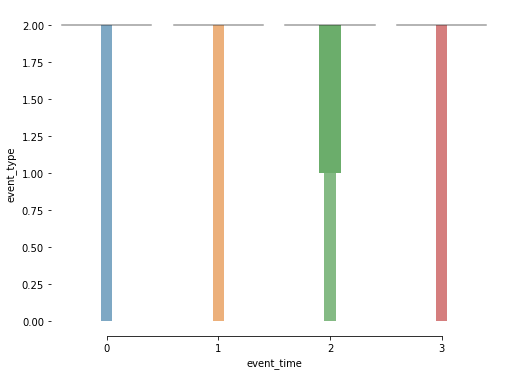

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
sns.boxenplot(x='event_time',y='event_type',data=df1)
sns.despine(trim=True,left=True)

In [16]:
corr=df1.corr()
corr

,event_time,event_type,brand,price
event_time,1.000000,-0.038824,-0.022833,-0.020420
event_type,-0.038824,1.000000,0.000357,0.000246
brand,-0.022833,0.000357,1.000000,-0.338100
price,-0.020420,0.000246,-0.338100,1.000000


(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text yticklabel objects>)

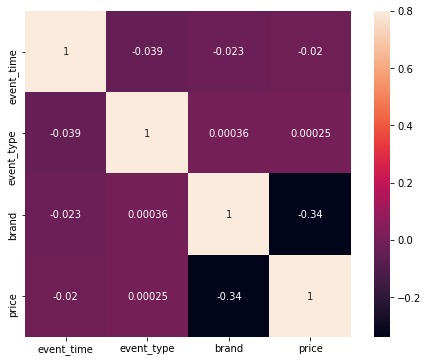

In [17]:
ax=plt.subplots(figsize=(8,6))
ax=sns.heatmap(corr,vmax=.8,square=True,annot=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Linear regression(2)

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [19]:
cols = list(df1)
cols.insert(1,cols.pop(cols.index('event_time'))) # 2是将d放在哪一列，cols.pop(cols.index('d')) 是要换的d列
df1 = df1.loc[:,cols] # 开始按照两列互换

## 对数据集进行测试集合训练集划分
# X：特征矩阵(类型一般是DataFrame)
# Y：特征对应的Label标签(类型一般是Series)
# test_size: 对X/Y进行划分的时候，测试集合的数据占比, 是一个(0,1)之间的float类型的值
# random_state: 数据分割是基于随机器进行分割的，该参数给定随机数种子；给一个值(int类型)的作用就是保证每次分割所产生的数数据集是完全相同的

X = df1.iloc[:,1:]
Y=df1['event_type']
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)


(5000, 3)
(1250, 3)
(5000,)


In [20]:
# 查看训练集上的数据信息(X)
X_train.describe()

,event_time,brand,price
count,5000.000000,5000.000000,5000.000000
mean,1.291400,285.072600,353.010970
std,1.145752,178.679467,380.758185
min,0.000000,0.000000,2.150000
25%,0.000000,88.000000,109.400000
50%,1.000000,316.000000,218.525000
75%,2.000000,427.000000,450.265000
max,3.000000,539.000000,2574.070000


In [21]:
from sklearn.preprocessing import StandardScaler
## 数据标准化
# StandardScaler：将数据转换为标准差为1的数据集(有一个数据的映射)
# scikit-learn中：如果一个API名字有fit，那么就有模型训练的含义，没法返回值
# scikit-learn中：如果一个API名字中有transform， 那么就表示对数据具有转换的含义操作
# scikit-learn中：如果一个API名字中有predict，那么就表示进行数据预测，会有一个预测结果输出
# scikit-learn中：如果一个API名字中既有fit又有transform的情况下，那就是两者的结合(先做fit，再做transform)
ss = StandardScaler() # 模型对象创建
X_train = ss.fit_transform(X_train) # 训练模型并转换训练集
X_test = ss.transform(X_test) ## 直接使用在模型构建数据上进行一个数据标准化操作 (测试集)

pd.DataFrame(X_train).describe()


D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


,0,1,2
count,5.000000e+03,5.000000e+03,5.000000e+03
mean,-2.624123e-16,-2.095879e-16,-1.325384e-16
std,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.127232e+00,-1.595601e+00,-9.215719e-01
25%,-1.127232e+00,-1.103050e+00,-6.398689e-01
50%,-2.543561e-01,1.731060e-01,-3.532410e-01
75%,6.185201e-01,7.943923e-01,2.554476e-01
max,1.491396e+00,1.421276e+00,5.833837e+00


In [22]:
## 模型训练
import numpy as np
lr = LinearRegression(fit_intercept=True) # 模型对象构建
'''
LinearRegression(fit_intercept=True, normalize=False,copy_X=True,n_jobs=1)
	fit_intercept：是否需要截距
	normalize：是否做标准化，上面已在单拿出来做了标准化
	copy_X：是否进行数据复制，如果复制了，对数据进行修改，就不会改变原数据
	n_jobs：并行运行。但需要CPU至少双核，基本不怎么用
'''
lr.fit(X_train, Y_train) ## 训练模型
## 模型校验
y_predict = lr.predict(X_test) ## 预测结果

print("training R2:",lr.score(X_train, Y_train))
print("test R2:",lr.score(X_test, Y_test))
mse = np.average((y_predict-Y_test)**2)
rmse = np.sqrt(mse)
print("rmse:",rmse)
# 输出模型训练得到的相关参数
print("model coefficient(θ):", end="")
print(lr.coef_)
print("model intercept:", end='')
print(lr.intercept_)


training R2: 0.0009360364422437151
test R2: 0.0016520881102173315
rmse: 0.375468971076779
model coefficient(θ):[-0.01258681 -0.00215579  0.00043764]
model intercept:1.9004


### Model testing (require sklearn version =0.24)  

In [23]:
## 模型保存/持久化
# 在机器学习部署的时候，实际上其中一种方式就是将模型进行输出；另外一种方式就是直接将预测结果输出
# 模型输出一般是将模型输出到磁盘文件
from sklearn.externals import joblib

# 保存模型要求给定的文件所在的文件夹比较存在
joblib.dump(ss, "df1_ss.model") ## 将标准化模型保存
joblib.dump(lr, "df1_lr.model") ## 将模型保存

['df1_lr.model']

In [24]:
#load model
ss3 = joblib.load("df1_ss.model") 
lr3 = joblib.load("df1_lr.model") 

# predict
df1 = [[3, 398, 127.91]]
df1 = ss.transform(df1)
print(df1)
lr.predict(df1)

[[ 1.49139628  0.63207428 -0.59125054]]


array([1.8800067])

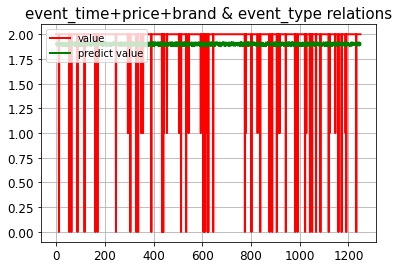

In [103]:
## 预测值和实际值画图比较
t=np.arange(len(X_test))
plt.figure(facecolor='w')#建一个画布，facecolor是背景色
plt.plot(t, Y_test, 'r-', linewidth=2, label='value')
plt.plot(t, y_predict, 'g-', linewidth=2, label='predict value')
plt.legend(loc = 'upper left')#显示图例，设置图例的位置
plt.title("event_time+price+brand & event_type relations", fontsize=15)
plt.grid(b=True)#加网格
plt.show()

# Linear Regression(3)

In [104]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
results = smf.ols(formula='event_time ~ event_type + price', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             event_time   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.021
Date:                Sat, 02 Oct 2021   Prob (F-statistic):            0.00244
Time:                        00:20:46   Log-Likelihood:                -9725.1
No. Observations:                6250   AIC:                         1.946e+04
Df Residuals:                    6247   BIC:                         1.948e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5301      0.070     21.757      0.0

# 2.Random forest

In [105]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [106]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3)
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)
print("Single Tree:{}".format(score_c)
,"Random Forest:{}".format(score_r)
)

Single Tree:0.8816 Random Forest:0.9056


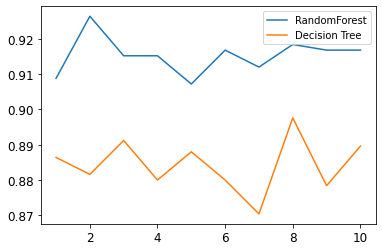

In [107]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,X,Y,cv=10)
clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,X,Y,cv=10)
plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()

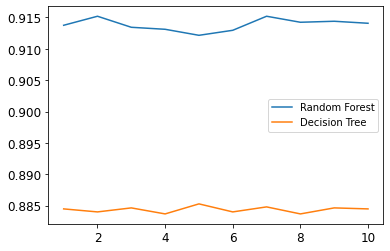

In [108]:
rfc_l = []
clf_l = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,X,Y,cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,X,Y,cv=10).mean()
    clf_l.append(clf_s)
plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()

# 3.KNN

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3)
knn = KNeighborsClassifier()    #实例化KNN模型
knn.fit(X_train, Y_train)      #放入训练数据进行训练
score_k = knn.score(Xtest,Ytest)
print(score_k)

0.9456


# 4.ADA Boost

In [111]:
from sklearn.ensemble import AdaBoostClassifier

In [112]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3)
ada = AdaBoostClassifier()    #实例化KNN模型
ada.fit(X_train, Y_train)       #放入训练数据进行训练
score_k = ada.score(Xtest,Ytest)
print(score_k)

0.9434666666666667


# 5.Netural network

In [113]:
from sklearn import preprocessing
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, Y = make_classification(random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, Y_train)  # apply scaling on training data
pipe.score(X_test, Y_test)

0.96

In [114]:
from sklearn.neural_network import MLPClassifier


rdm = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(6228,1500,1000,), random_state=1)
rdm.fit(X_train, Y_train)
rdm.score(X_test,Y_test)

0.92